**Introduction**

In this project, we wanted to find out which neighborhoods are the best for driving. We looked at things like speed bumps, traffic signs, and the most recently paved streets because we think that less of these things make driving smoother. So, we counted how many speed bumps and traffic signs there are in each neighborhood, and we checked when the streets were last paved. This helps us see which neighborhoods have fewer things that slow down driving. We thought about including other factors like how busy the roads are and how many accidents happen, but we decided to focus on just the physical stuff like speed bumps and signs. Overall, we're trying to figure out which neighborhoods are easiest to drive through by looking at these things.

**Metrics**

We used information from the Western Pennsylvania Regional Data Center to help us decide which neighborhoods are better to drive on. First, we looked at a dataset called "City Traffic Signs"(https://data.wprdc.org/dataset/city-traffic-signs) to find roads with fewer stop signs because they make driving smoother. Then, we checked another dataset about "City of Pittsburgh Speed Humps" (https://data.wprdc.org/dataset/city-of-pittsburgh-speed-humps) in Pittsburgh to see which neighborhoods have fewer of them, as we think fewer speed bumps mean a nicer neighborhood. Lastly, we looked at when roads were last paved using data from "Paving Schedule" (https://data.wprdc.org/dataset/paving-schedule). We believe roads with fresh pavement are better than ones with old pavement. This helped us find the best roads and the neighborhoods they're in.


**City Traffic Signs** (Alexendra Hansen)

In [1]:
import pandas as pd


f = pd.read_csv('City traffic signs.csv')
##neighborhood, street, description

c = f[['street', 'description', 'neighborhood']]

stop = c[f['description'] == 'Stop']

nb = stop.value_counts('neighborhood')
nb


neighborhood
Brookline               349
Carrick                 312
South Side Flats        292
Squirrel Hill South     257
Shadyside               228
                       ... 
Allegheny Center          8
St. Clair                 6
South Shore               5
Arlington Heights         4
Mount Oliver Borough      1
Length: 91, dtype: int64

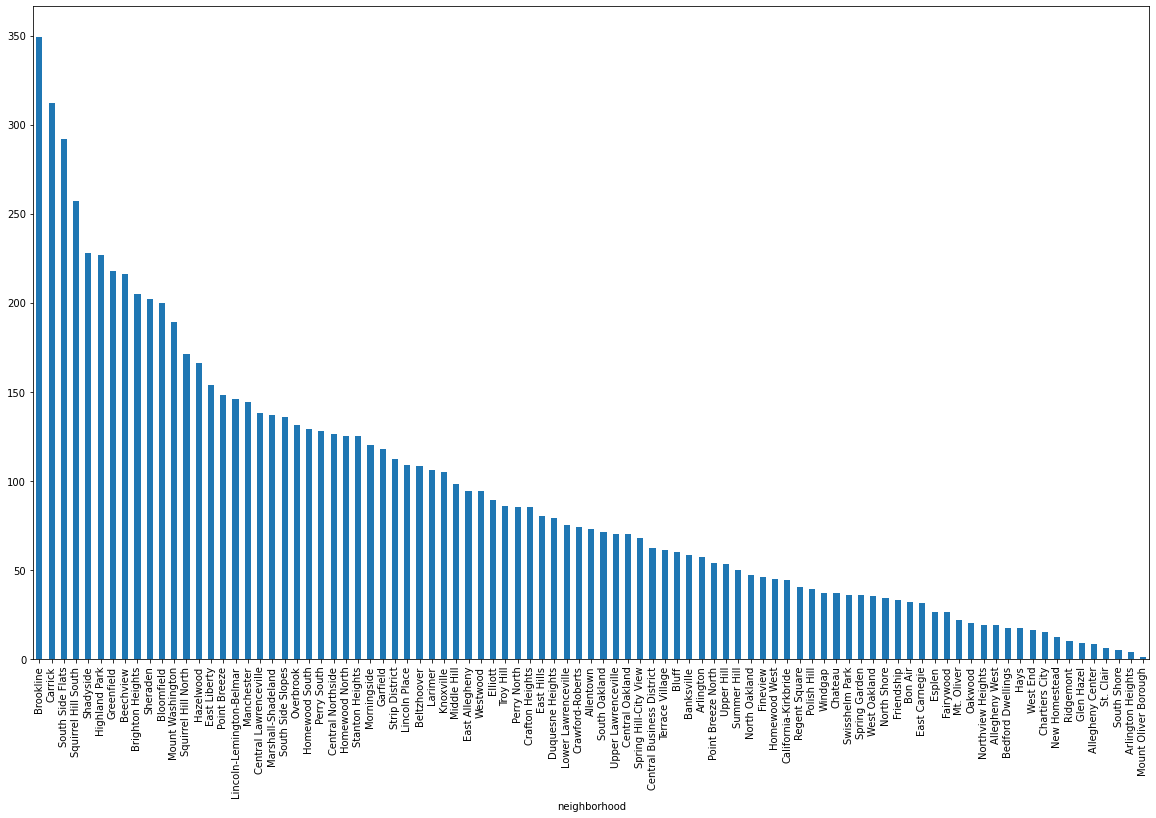

In [2]:
nb.plot.bar(figsize=(20,12))

In [3]:
grp = stop.groupby('neighborhood').count()
grp.rename(columns= { 'description' : 'number of stop signs in neighborhood'}, inplace = True)
b = grp.sort_values(by=['number of stop signs in neighborhood'], ascending=True).head(5)

b



,street,number of stop signs in neighborhood
neighborhood,,
Mount Oliver Borough,1,1
Arlington Heights,4,4
South Shore,5,5
St. Clair,6,6
Allegheny Center,7,8


**Speed Humps** (Huma Mamnnoon)

In [4]:
import pandas as pd
%matplotlib inline

data = pd.read_csv("speed_humps.csv")
data.head(10)

,_id,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,34,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,67,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,68,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,69,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355
5,100,25169591,10,4224.0,Saline St,4673,Asphalt,Squirrel Hill South,5,15,42003141400,3,15,4,2-15,40.422239,-79.926208
6,101,2056880845,11,2146.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.391643,-79.999307
7,102,1735565853,12,2082.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.392425,-79.999259
8,103,857069875,13,2013.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.393264,-79.999401
9,104,1822275525,14,1937.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.394180,-79.999611


In [5]:
neighborhood_counts = data.groupby("neighborhood")['id'].count()
print(neighborhood_counts)

neighborhood
Bloomfield              3
Brookline               4
Carrick                 9
Central Oakland         1
Garfield                3
Highland Park           2
Homewood South          4
Mount Washington        3
North Oakland           6
Overbrook               1
Perry North             4
Polish Hill             6
South Side Flats        3
South Side Slopes       4
Squirrel Hill North     3
Squirrel Hill South    18
Stanton Heights         1
Upper Hill              4
Name: id, dtype: int64


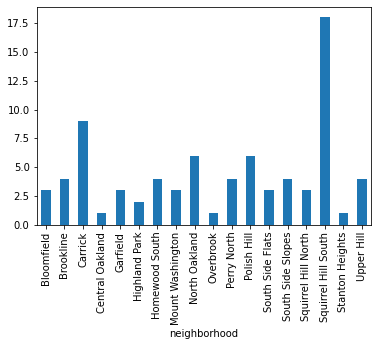

In [6]:
neighborhood_counts.plot.bar()

**Paving Schedule**

In [12]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("paving_schedule.csv")
data.head(10)

,_id,id,street_id,activity,task_description,status,street,start_year,stop_date_actual,route_ahead,route_back
0,1,1924601586,17060,Mechanical Patching,Paved as part of 2016 City paving program.,Completed,BALDWICK RD,2016,2016-10-31,NOBLESTOWN RD,STEEN ST
1,2,1512981617,9881,Mechanical Patching,Paved as part of 2016 City paving program.,Completed,GLENBURY ST,2016,2016-10-31,KOHEN ST,SELDON ST
2,3,640675845,6563,Mechanical Patching,Paved as part of City 2016 paving program.,Completed,S BELLEFIELD AVE,2016,2016-10-01,FILMORE ST,FIFTH AVE
3,4,538119097,17748,Mechanical Patching,Paved as part of City 2016 paving program.,Completed,S BELLEFIELD AVE,2016,2016-10-01,FORBES AVE,FILMORE ST
4,5,726876041,17060,Base Repair,NaN,Completed,BALDWICK RD,2009,2009-06-05,NOBLESTOWN RD,STEEN ST
5,6,1280601859,2137,Base Repair,NaN,Completed,N BRADDOCK AVE,2014,2014-04-15,SUSQUEHANNA ST,ANNAN WAY
6,7,1567782563,373,Base Repair,NaN,Completed,LIME ST,2009,2009-04-14,DEAD END,SAW MILL RUN BLVD
7,8,176640290,14702,Base Repair,NaN,Completed,JILLSON AVE,2013,2013-10-02,PARQUET ST,BROOKLINE BLVD
8,9,2010963472,5678,Base Repair,NaN,Completed,WESTMONT AVE,2009,2009-07-20,W AGNEW RD,COPPERFIELD AVE
9,10,2074462995,11938,Base Repair,NaN,Completed,BRABEC ST,2014,2014-07-25,BASIN ST,PROVINCE ST


In [13]:
paved_streets = data[data['status'] == 'Completed'].copy()

paved_streets.loc[:, 'stop_date_actual'] = pd.to_datetime(paved_streets['stop_date_actual'])
most_recent_year = paved_streets['start_year'].max()
most_recent_streets = paved_streets[paved_streets['start_year'] == most_recent_year]
max_stop_date = most_recent_streets['stop_date_actual'].max()
most_recent_streets = most_recent_streets[most_recent_streets['stop_date_actual'] == max_stop_date]

print("Most recent streets paved for the most recent year (", most_recent_year, "):")
print(most_recent_streets[['status', 'street', 'start_year', 'stop_date_actual']])

Most recent streets paved for the most recent year ( 2021 ):
         status          street  start_year stop_date_actual
9444  Completed  BANKSVILLE AVE        2021       2021-05-04
9445  Completed  BANKSVILLE AVE        2021       2021-05-04
9446  Completed     CARNAHAN RD        2021       2021-05-04


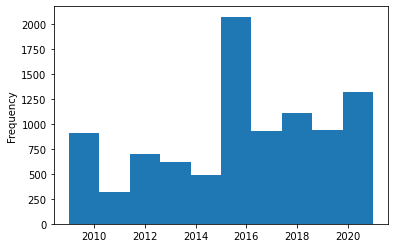

In [14]:
year = data['start_year']
year.plot.hist()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

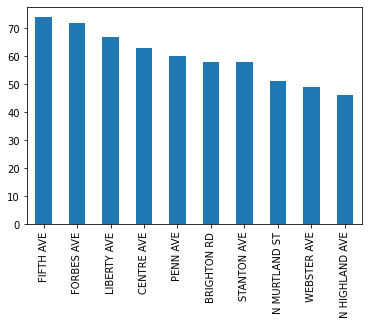

In [15]:
street = data['street'].value_counts().head(10)
street.plot.bar()
plt.show

In [20]:
import random

def pick_random_neighborhood(neighboorhood):
    return random.choice(neighboorhood)

neighboorhood = ["Mount Oliver Borough", "Central Oakland", "Overbrook", "Stanton Heights", "Banksville"]
random_neighborhood = pick_random_neighborhood(neighboorhood)
print("The winner is:", random_neighborhood)


The winner is: Central Oakland


**Conclusion - Alexandra:** The "best" neighborhood to drive in is Mount Oliver Borough due to its very low amount of stop signs (1). Despite having some speed humps, making a full stop will slow you down more than a speed hump, so the lack of stop signs makes it the better neighborhood.

**Conclusion** -- Huma